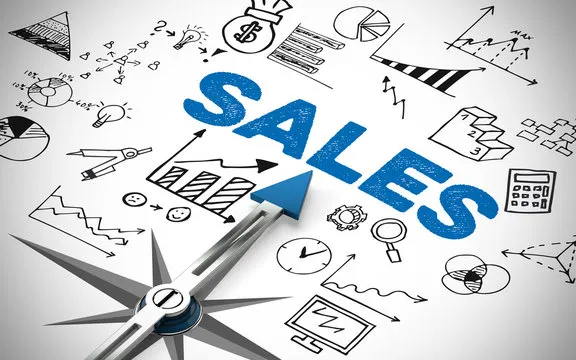

**objective**:Consider sales dataset and and analyse it in proper way
**Need a clraity on who is spending more money for shoppping wrt Gender,age_group,States,occupation,product_category,**

In [49]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Taj1920/Data_Analysis/main/sales_data_project/sales_data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Data Cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [52]:
#removing status and unnamed column
df=df.drop(['Status','unnamed1'],axis=1)

In [53]:
#removing Nan values
df.dropna(inplace=True)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [54]:
#Handling Gender M-> Male and F->Female
df['Gender'].unique()
l={'F':'Female','M':'Male'}
df['Gender']=df['Gender'].map(l)

In [55]:
df['State'].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [56]:
#Replacing Wrong data with Right Data
df['Marital_Status']=df['Marital_Status'].map({0:'Single',1:'Married'})
df['State']=df['State'].str.replace('Andhra\xa0Pradesh','Andrapradesh')

In [57]:
df['State'].unique()

array(['Maharashtra', 'Andrapradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

In [58]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andrapradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,Female,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,Male,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


In [65]:
#Resetting the index Numbers and removing un-necessary Columns
df.reset_index(inplace=True)
df=df.drop(['level_0','index'],axis=1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andrapradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [66]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andrapradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370.0
11235,1004089,Reichenbach,P00171342,Male,26-35,33,Single,Haryana,Northern,Healthcare,Veterinary,3,367.0
11236,1001209,Oshin,P00201342,Female,36-45,40,Single,Madhya Pradesh,Central,Textile,Office,4,213.0
11237,1004023,Noonan,P00059442,Male,36-45,37,Single,Karnataka,Southern,Agriculture,Office,3,206.0


In [67]:
#Removing Duplicate rows
df.drop_duplicates(inplace=True)

In [69]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andrapradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


Data Visualization

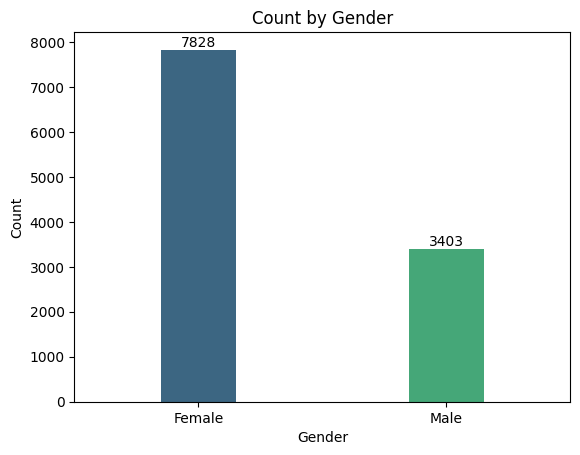

In [78]:
#count by Gender
a=sns.countplot(x='Gender',data=df,hue='Gender',palette='viridis',width=0.3)
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for i in a.containers:
  a.bar_label(i)

Count of Female>Male

In [84]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

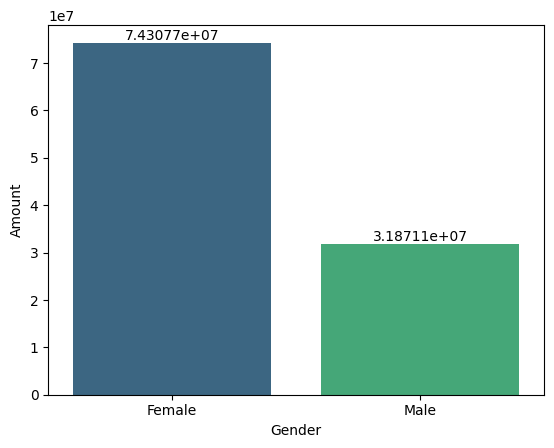

In [86]:
#Total amount by Gender
gender=df.groupby('Gender')['Amount'].sum()
gender=pd.DataFrame(gender).reset_index()
a=sns.barplot(x='Gender',y='Amount',data=gender,hue='Gender',palette='viridis')
data_label(a)


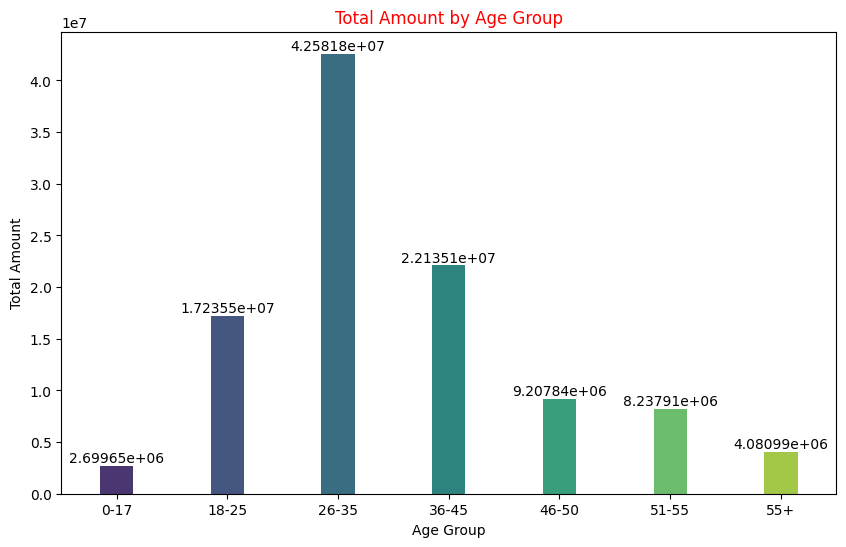

In [114]:
#Total Amount by Age_group
plt.figure(figsize=(10,6))
Age=df.groupby('Age Group')['Amount'].sum()
Age=pd.DataFrame(Age).reset_index()
a=sns.barplot(x='Age Group',y='Amount',data=Age,hue='Age Group',palette='viridis',width=0.3)
plt.title('Total Amount by Age Group',color='Red')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
data_label(a)

**Age Group 26-35 Spending More money Compared to Others**

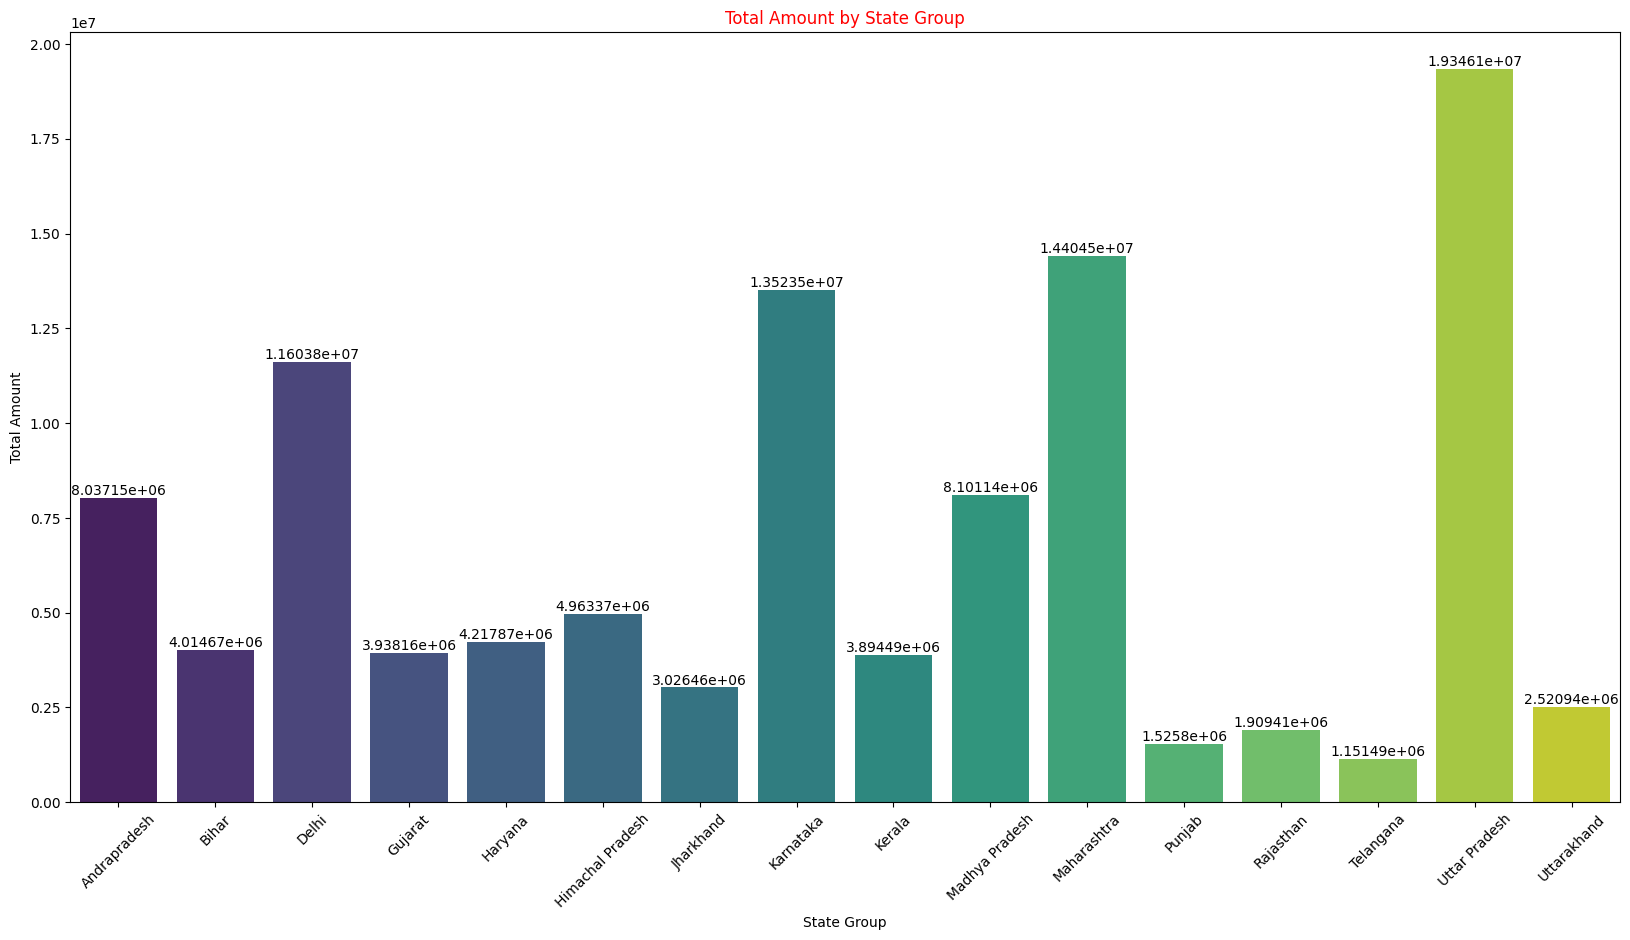

In [106]:
#Total Amount Spend by State Group
state=df.groupby('State')['Amount'].sum()
plt.figure(figsize=(20,10))
state=pd.DataFrame(state).reset_index()
a=sns.barplot(x='State',y='Amount',data=state,hue='State',palette='viridis')
plt.title('Total Amount by State Group',color='Red')
plt.xlabel('State Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
data_label(a)

**States like Uttarapradesh,maharashtra,Karnataka,delhi and Madhya Pradesh Spending More Money Compared to other States**

In [107]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andrapradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


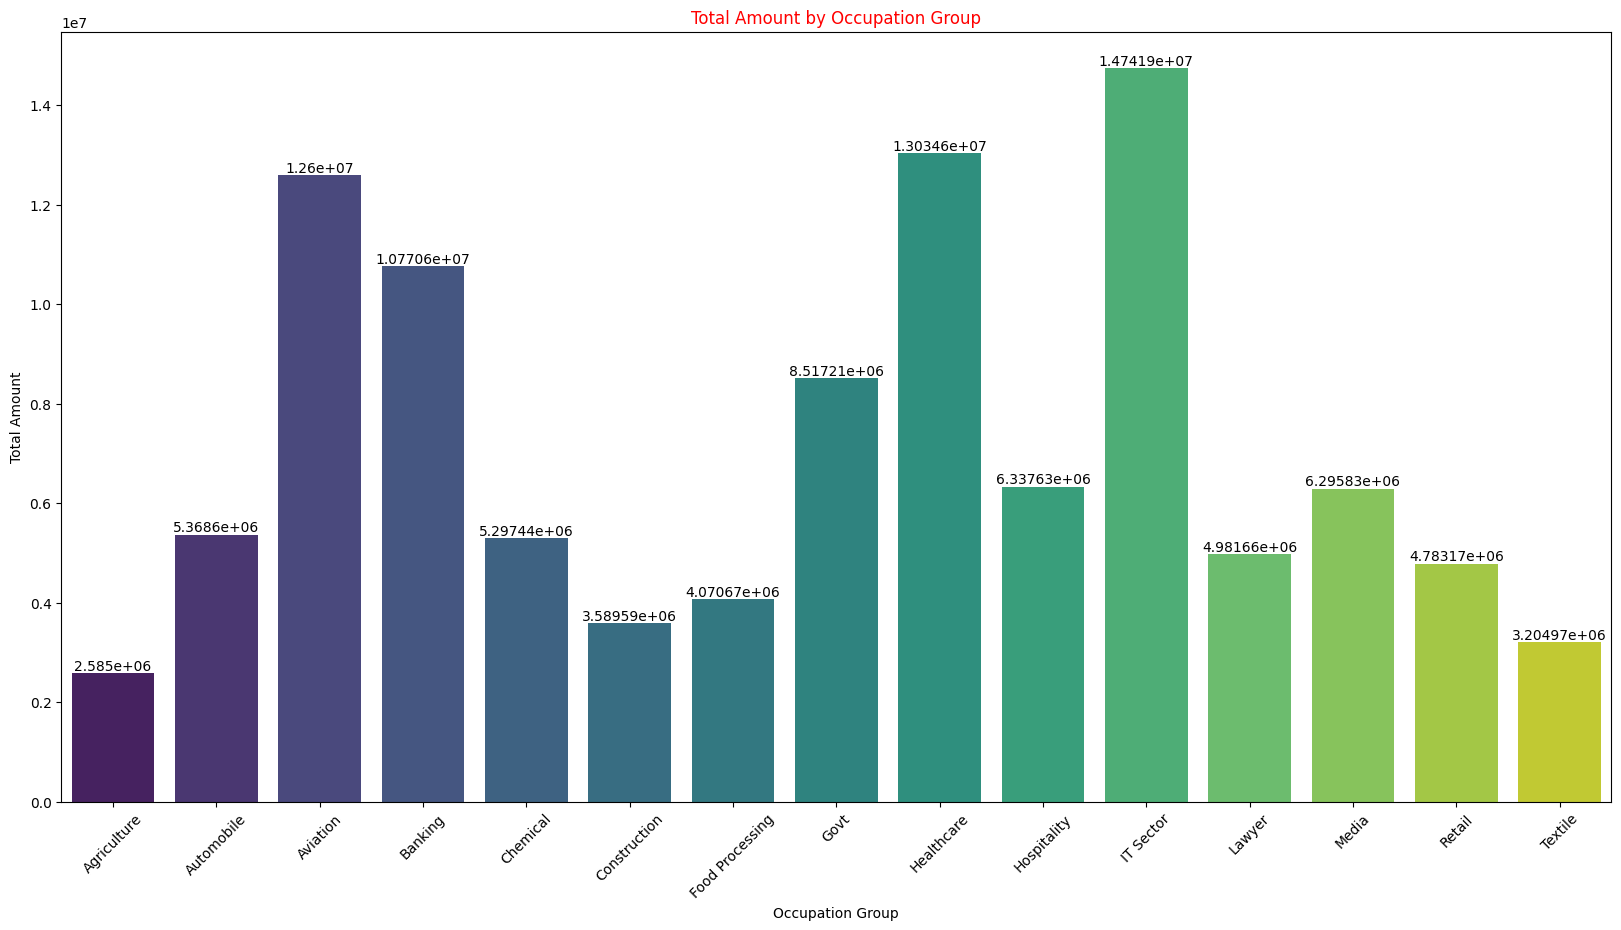

In [115]:
#Total amount spent by occupation
occupation=df.groupby('Occupation')['Amount'].sum()
plt.figure(figsize=(20,10))
occupation=pd.DataFrame(occupation).reset_index()
a=sns.barplot(x='Occupation',y='Amount',data=occupation,hue='Occupation',palette='viridis')
plt.title('Total Amount by Occupation Group',color='Red')
plt.xlabel('Occupation Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
data_label(a)

**Total Amount spent High is in IT,helathcare,Aviation,Banking and Govt Compared to Others**

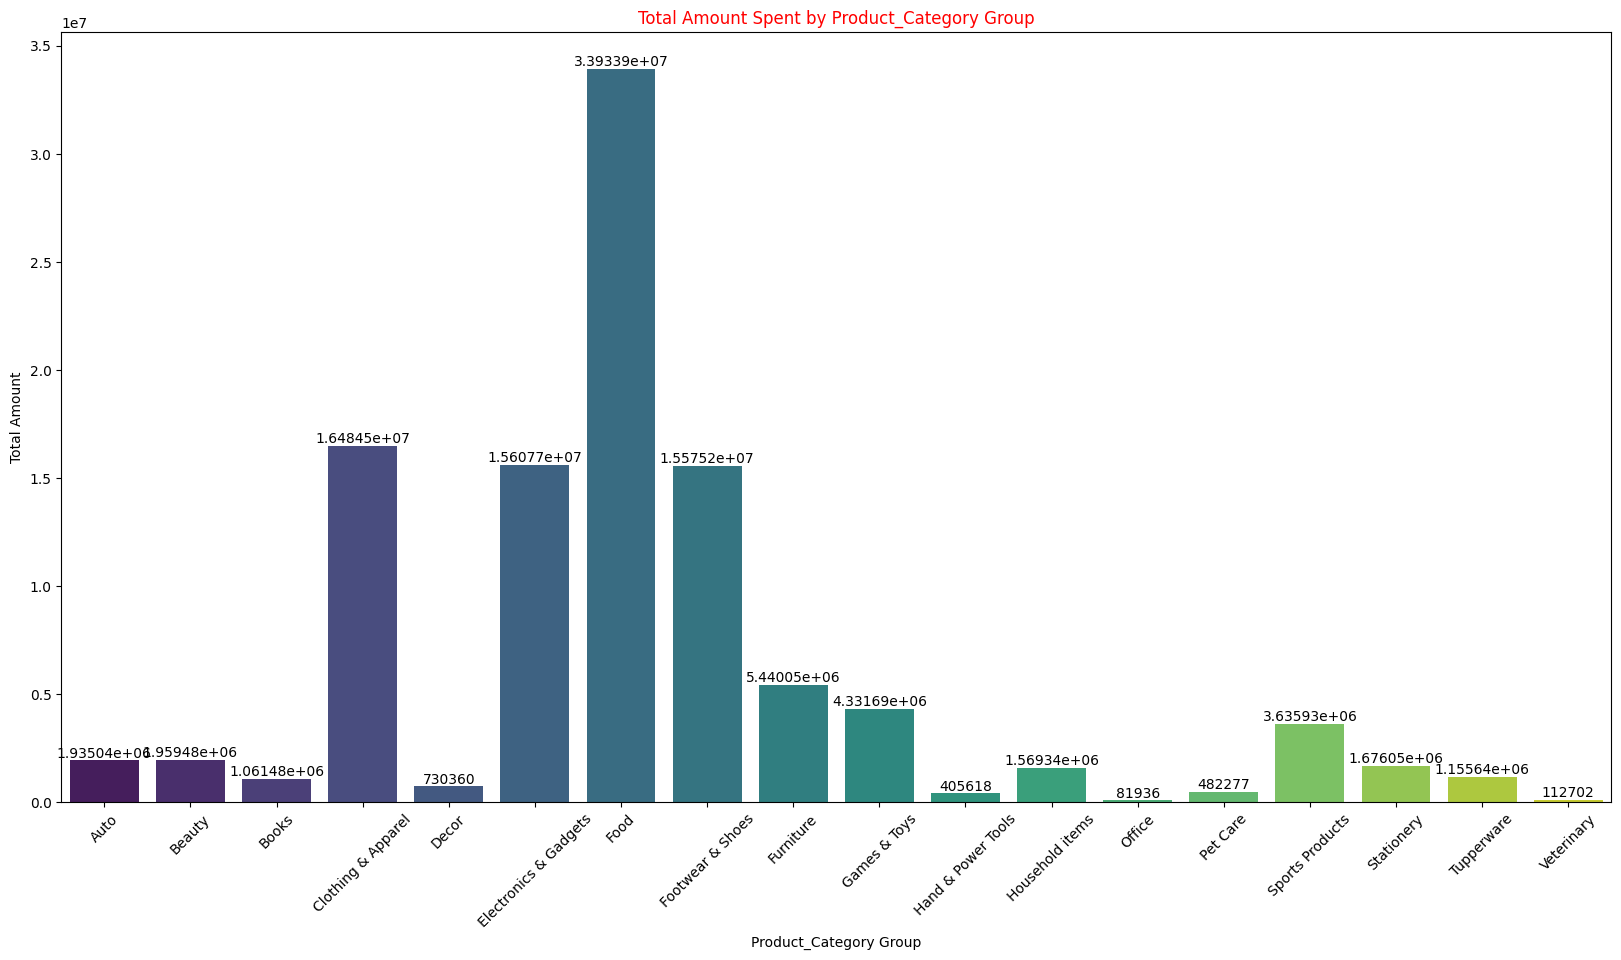

In [118]:
#Total Amount spent by Product category Group
product_cat=df.groupby('Product_Category')['Amount'].sum()
plt.figure(figsize=(20,10))
product_cat=pd.DataFrame(product_cat).reset_index()
a=sns.barplot(x='Product_Category',y='Amount',data=product_cat,hue='Product_Category',palette='viridis')
plt.title('Total Amount Spent by Product_Category Group',color='Red')
plt.xlabel('Product_Category Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
data_label(a)

**Money Spent for Food,clothing&apparel,electronics & gadgets and footware and shoes is Higher Compared to Other categories**